# Importing Libraries

In [1]:
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('default')
import keras.backend as K

## Loading the CNN Model and the Resnet50 Model

In [2]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [3]:
resnet50 = keras.models.load_model('resnet.h5', compile = False)
resnet50.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [4]:
cnn = keras.models.load_model('cnn.h5')

In [5]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

In [6]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

## Prediction using CNN Model and RESNET50 Model

In [7]:
def load_and_prep_image(filename, img_shape = 48):

    img = cv2.imread(filename)

    GrayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)
    
    for x,y,w,h in faces:
        
        roi_GrayImg = GrayImg[ y: y + h , x: x + w ]
        roi_Img = img[ y: y + h , x: x + w ]
        
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        
        faces = faceCascade.detectMultiScale(roi_Img, 1.1, 4)
        
        if len(faces) == 0:
            print("No Faces Detected")
        else:
            for (ex, ey, ew, eh) in faces:
                img = roi_Img[ ey: ey+eh , ex: ex+ew ]
    
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    RGBImg= cv2.resize(RGBImg,(img_shape,img_shape))

    RGBImg = RGBImg/255.

    return RGBImg

In [8]:
def CNN_pred_and_plot(filename, class_names):
    
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = cnn.predict(tf.expand_dims(img, axis=0) , verbose=0)

    # Get the predicted class
    pred_class = class_names[pred.argmax()]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

def resnet_pred_and_plot(filename, class_names):
    
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = resnet50.predict(tf.expand_dims(img, axis=0) , verbose=0)

    # Get the predicted class
    pred_class = class_names[pred.argmax()]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

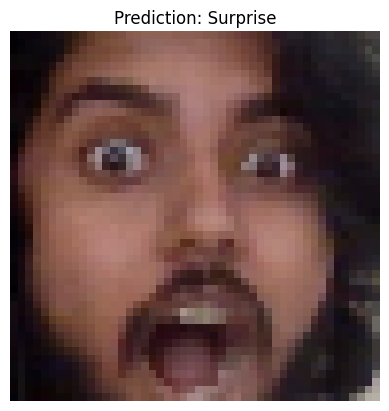

In [19]:
CNN_pred_and_plot("captured-images/saved_img14.jpg", Emotion_Classes) # with CNN

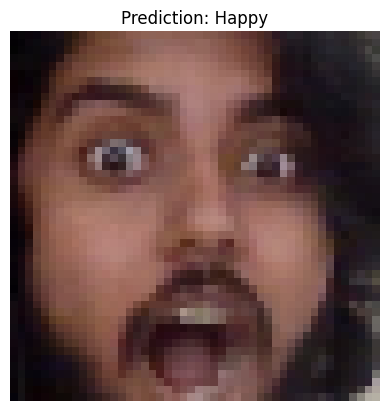

In [18]:
resnet_pred_and_plot("captured-images/saved_img14.jpg", Emotion_Classes) # with Resnet50